# Taller 5: Grafos y algoritmos voraces

1.Implemente el algoritmo de búsqueda en profundidad (DFS) y pruebelo para recorrer el grafo del laberinto de pacman.

In [28]:
def busquedaProfundidadDFS(G, begin):
    
    check, apilr = set(), [begin]
    
    while apilr:
        nodo = apilr.pop()
        
        if nodo not in check:
            
            check.add(nodo)
            apilr.extend(G[nodo] - check)
            
    return check

G =     {'1': set(['2', '6', '3']),
         
         '2': set(['4','3', '4','6', '2','1', '4']),
         
         '3': set(['2']),
         
         '4': set(['5']),
         
         '5': set(['2', '6', '3', '4']),
         
         '6': set(['3', '4'])}


In [29]:
print "El resultado de la búsqueda en profundidad (DFS) es: "
busquedaProfundidadDFS(G, '1')

El resultado de la búsqueda en profundidad (DFS) es: 


{'1', '2', '3', '4', '5', '6'}

2.Realice el análisis del tiempo de ejecución del algoritmo DFS, justifiquelo.

In [ ]:
import math
import numpy as np
import pylab as pl
import time 


import random 
import pylab  
import math
import numpy as np

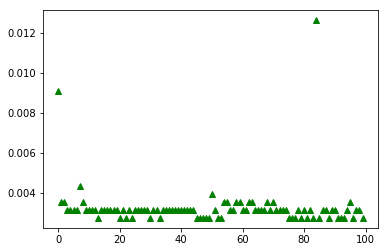

In [34]:
G2 = {'A': set(['D', 'F']),
      
         'B': set(['C', 'A', 'F']),
      
         'C': set(['A', 'F']),
      
         'D': set(['C']),
      
         'E': set(['B', 'F']),
      
         'F': set(['A', 'F'])}


def experAnalysis_busquedaProfundidadDFS(n):
    final = []
    
    for i in range(n):
        
        l = list(range(i))
        random.shuffle(l)
        tic = time.clock()
        dfs(G2, 'A') 
        
        toc = time.clock()
        final.append((toc-tic))
        
    return final

pylab.clf()

x = np.arange(100)

y = np.array(experAnalysis_busquedaProfundidadDFS(100))*1000


pylab.plot(x, y, 'g^')
pylab.show()

3.Diseñe e implemente un algoritmo que identifique ciclos en un grafo.

In [36]:
def verificarCiclos(grafo, inicio):
    
    check, pil = set(), [inicio]
    nodo_2=[]
    
    #print(pil);
    while pil:
        nodo = pil.pop()
        #print("nodo sacado: ", nodo)
        if nodo not in check:
            nodo_2.append(nodo);
            check.add(nodo)
            #print("Lista: ",check)
            pil.extend(grafo[nodo] - check)
            #print("Adicionando: ",  pil)
        else:
            print "La verificación es cierta. Hay ciclos en el grafo."
            return
    return check, nodo_2;

4.Diseñe e implemente un algoritmo que verifique si un grafo es bipartito o no.

In [ ]:
import Queue

def verificarBipartito(G):
    
    cola = Queue.Queue()
    cola.put(0)
    color = [None]*G.get_num_nodo()
    color[0] = 0
    verificarBipartito = True
    
    
    while(not cola.empty() and verificarBipartito == True):
        u = cola.get()
        
        for j in G.get_Adj_list()[u]:
            
            if(color[j] == None):
                color[j] = 1 - color[u]
                cola.put(j)
                
            elif (color[j] == color[u]):
                verificarBipartito = False
                break
                
    return verificarBipartito

print verificarBipartito(G)

5.Modifique el algoritmo de dijkstra para solucionar el problema de la ruta más corta en un grafo sin pesos, i.e. partiendo de un nodo inicial encontrar la ruta y su distancia a todos los demás nodos haciendo la menor cantidad de saltos (nodos en la ruta)

In [ ]:
from pilaq import pilapush, pilapop

def actualizarPila(pila,d,v):
    
    for i in range(len(pila)):
        
        if pila[i][1] == v:
            
            pila[i][0] = d
            fix_minpila(pila,i) # pila=pilaify(pila) ineficient      
            break    

def MinimoPila(pila, i):
    
    if i == 0: return  
    
    p = int(i/2) #parent  
    
    if p >= 0 and pila[p][0] > pila[i][0]:
        
        pila[i], pila[p] = pila[p], pila[i]
        MinimoPila(pila,p)   
            
def Dijkstra(G,begin):
        
    D = {} # dictionary of final distances
    
    for v in G:
        D[v] = float('inf')
        
    D[begin] = 0
    
    P = {} # dictionary of predecessors
    
    Q=[] #  priority queue est.dist. of non-final vert.
    
    for v in G:
        
        item = []
        item.append(D[v])
        item.append(v)
        pilapush(Q,item)
    
    
    #S = []
    while Q:
        u = pilapop(Q)[1]
        #S.append(u)
        
        for v in G[u]:
            newDuv = D[u] + 1
            
            if newDuv < D[v]:
                
                P[v] = u
                D[v] = newDuv
                actualizarPila(Q,D[v],v)
                
    return D,P

In [2]:
G = {'s': {'u':10, 'x':5},
    'u': {'v':1, 'x':2},
    'v': {'y':4},
    'x':{'u':3,'v':9,'y':2},
    'y':{'s':7,'v':6}}

print(Dijkstra(G,'s'))

({'y': 2, 'x': 1, 's': 0, 'u': 1, 'v': 2}, {'y': 'x', 'x': 's', 'u': 's', 'v': 'x'})
